In [24]:
#Important imports
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
class DataSet(Dataset):
    
    def __init__(self, path):
        self.dataset = torch.tensor(pd.read_csv(path).values)
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, i):
        return self.dataset[i, :-1], self.dataset[i, -1]

In [26]:
class Net(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features # 13
        
        # layer1 care din 13 neuroni face 16
        # fully connected
        self.fc1 = nn.Linear(self.n_features, 16) 
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out
# relu(-5) = 0 relu(-5555) = 0, but for positive numbers it is activated
    

In [38]:
def training_loop(n_epoch, optimizer, model, loss_fn, train_loader, test_loader, print_plot):
    
    train_accuracy = torch.zeros(n_epoch)
    test_accuracy = torch.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        
        for example, label in train_loader:
            
            example = example.to(DEVICE)
            label = label.to(DEVICE)
            
            label = label.unsqueeze(1)
            
            output = model(example.float())
            
            # eraoarea care se calculeaza
            loss = loss_fn(output, label.float())
            
            optimizer.zero_grad() #zero gradient. erorile care s-au acumulat trebuie sterse
            loss.backward()
            optimizer.step()
        
        with torch.no_grad():

            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total

        if (epoch+1) % 10 ==0:
            print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}')
    
    if print_plot:
    #Setting x-ticks
        epochs = range(n_epoch)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show() 

In [39]:
data = DataSet('D:\Eu\cvcamp\diabetes.csv')

n_sample = len(data)
n_test = int(0.2*n_sample)

train_set, test_set = torch.utils.data.random_split(data, [n_sample-n_test, n_test])

train_loader = torch.utils.data.DataLoader(train_set, batch_size = len(train_set), shuffle = True)
test_loader = torch.utils.data.DataLoader(train_set, batch_size = len(test_set), shuffle = True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.6439024209976196 Test Accuracy: 0.6439024209976196
Epoch 20) Train Accuracy: 0.6943089365959167 Test Accuracy: 0.6943089365959167
Epoch 30) Train Accuracy: 0.6926829218864441 Test Accuracy: 0.6926829218864441
Epoch 40) Train Accuracy: 0.7154471278190613 Test Accuracy: 0.7154471278190613
Epoch 50) Train Accuracy: 0.7268292903900146 Test Accuracy: 0.7268292903900146
Epoch 60) Train Accuracy: 0.7170731425285339 Test Accuracy: 0.7170731425285339
Epoch 70) Train Accuracy: 0.7414634227752686 Test Accuracy: 0.7414634227752686
Epoch 80) Train Accuracy: 0.7512195110321045 Test Accuracy: 0.7512195110321045
Epoch 90) Train Accuracy: 0.7577235698699951 Test Accuracy: 0.7577235698699951
Epoch 100) Train Accuracy: 0.7739837169647217 Test Accuracy: 0.7739837169647217
Epoch 110) Train Accuracy: 0.7788617610931396 Test Accuracy: 0.7788617610931396
Epoch 120) Train Accuracy: 0.7918699383735657 Test Accuracy: 0.7918699383735657
Epoch 130) Train Accuracy: 0.7967479825019836 Tes

Epoch 1040) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 1050) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 1060) Train Accuracy: 0.8861788511276245 Test Accuracy: 0.8861788511276245
Epoch 1070) Train Accuracy: 0.8780487775802612 Test Accuracy: 0.8780487775802612
Epoch 1080) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 1090) Train Accuracy: 0.8926829099655151 Test Accuracy: 0.8926829099655151
Epoch 1100) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 1110) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 1120) Train Accuracy: 0.8991869688034058 Test Accuracy: 0.8991869688034058
Epoch 1130) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 1140) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 1150) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 1160) Train Accuracy: 

Epoch 2060) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 2070) Train Accuracy: 0.9138211607933044 Test Accuracy: 0.9138211607933044
Epoch 2080) Train Accuracy: 0.9073171019554138 Test Accuracy: 0.9073171019554138
Epoch 2090) Train Accuracy: 0.9121951460838318 Test Accuracy: 0.9121951460838318
Epoch 2100) Train Accuracy: 0.9121951460838318 Test Accuracy: 0.9121951460838318
Epoch 2110) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 2120) Train Accuracy: 0.930081307888031 Test Accuracy: 0.930081307888031
Epoch 2130) Train Accuracy: 0.9268292784690857 Test Accuracy: 0.9268292784690857
Epoch 2140) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 2150) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 2160) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 2170) Train Accuracy: 0.9268292784690857 Test Accuracy: 0.9268292784690857
Epoch 2180) Train Accuracy: 0.90

Epoch 3080) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 3090) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 3100) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 3110) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 3120) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 3130) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 3140) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 3150) Train Accuracy: 0.8243902325630188 Test Accuracy: 0.8243902325630188
Epoch 3160) Train Accuracy: 0.8146341443061829 Test Accuracy: 0.8146341443061829
Epoch 3170) Train Accuracy: 0.86504065990448 Test Accuracy: 0.86504065990448
Epoch 3180) Train Accuracy: 0.86504065990448 Test Accuracy: 0.86504065990448
Epoch 3190) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 3200) Train Accuracy: 0.918699

Epoch 4100) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 4110) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 4120) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 4130) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 4140) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 4150) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 4160) Train Accuracy: 0.8211382031440735 Test Accuracy: 0.8211382031440735
Epoch 4170) Train Accuracy: 0.842276394367218 Test Accuracy: 0.842276394367218
Epoch 4180) Train Accuracy: 0.8829268217086792 Test Accuracy: 0.8829268217086792
Epoch 4190) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 4200) Train Accuracy: 0.9154471755027771 Test Accuracy: 0.9154471755027771
Epoch 4210) Train Accuracy: 0.9170731902122498 Test Accuracy: 0.9170731902122498
Epoch 4220) Train Accuracy: 0.

Epoch 5120) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5130) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5140) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 5150) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 5160) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 5170) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 5180) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 5190) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5200) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5210) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 5220) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 5230) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5240) Train Accuracy: 

Epoch 6140) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 6150) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 6160) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 6170) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 6180) Train Accuracy: 0.8276422619819641 Test Accuracy: 0.8276422619819641
Epoch 6190) Train Accuracy: 0.7707316875457764 Test Accuracy: 0.7707316875457764
Epoch 6200) Train Accuracy: 0.8308942914009094 Test Accuracy: 0.8308942914009094
Epoch 6210) Train Accuracy: 0.855284571647644 Test Accuracy: 0.855284571647644
Epoch 6220) Train Accuracy: 0.8813008069992065 Test Accuracy: 0.8813008069992065
Epoch 6230) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 6240) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 6250) Train Accuracy: 0.9138211607933044 Test Accuracy: 0.9138211607933044
Epoch 6260) Train Accuracy: 0.

Epoch 7160) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 7170) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 7180) Train Accuracy: 0.9430894255638123 Test Accuracy: 0.9430894255638123
Epoch 7190) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 7200) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 7210) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 7220) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 7230) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 7240) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 7250) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 7260) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 7270) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 7280) Train Accuracy: 0.

Epoch 8180) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 8190) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 8200) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8210) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 8220) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8230) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 8240) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 8250) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 8260) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 8270) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 8280) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8290) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8300) Train Accuracy: 0.933333

Epoch 9200) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 9210) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 9220) Train Accuracy: 0.9219512343406677 Test Accuracy: 0.9219512343406677
Epoch 9230) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 9240) Train Accuracy: 0.9430894255638123 Test Accuracy: 0.9430894255638123
Epoch 9250) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 9260) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 9270) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 9280) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 9290) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 9300) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 9310) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 9320) Train Accuracy: 0.93

Epoch 10220) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 10230) Train Accuracy: 0.9430894255638123 Test Accuracy: 0.9430894255638123
Epoch 10240) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 10250) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 10260) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 10270) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 10280) Train Accuracy: 0.9463414549827576 Test Accuracy: 0.9463414549827576
Epoch 10290) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 10300) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 10310) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 10320) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 10330) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 10340) Train

Epoch 11230) Train Accuracy: 0.8894308805465698 Test Accuracy: 0.8894308805465698
Epoch 11240) Train Accuracy: 0.9219512343406677 Test Accuracy: 0.9219512343406677
Epoch 11250) Train Accuracy: 0.9203252196311951 Test Accuracy: 0.9203252196311951
Epoch 11260) Train Accuracy: 0.9219512343406677 Test Accuracy: 0.9219512343406677
Epoch 11270) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 11280) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 11290) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 11300) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 11310) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 11320) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 11330) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 11340) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 11350) Tra

Epoch 12240) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 12250) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 12260) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 12270) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 12280) Train Accuracy: 0.9430894255638123 Test Accuracy: 0.9430894255638123
Epoch 12290) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 12300) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 12310) Train Accuracy: 0.9430894255638123 Test Accuracy: 0.9430894255638123
Epoch 12320) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 12330) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 12340) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 12350) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 12360) Tra

Epoch 13250) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 13260) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 13270) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 13280) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 13290) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 13300) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 13310) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 13320) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 13330) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 13340) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 13350) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 13360) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 13370) Tra

Epoch 14250) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 14260) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 14270) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 14280) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 14290) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 14300) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 14310) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 14320) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 14330) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 14340) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 14350) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 14360) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 14370) Tra

Epoch 15250) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 15260) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 15270) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 15280) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 15290) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 15300) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 15310) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 15320) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 15330) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 15340) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 15350) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 15360) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 15370) Tra

Epoch 16260) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 16270) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16280) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16290) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 16300) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16310) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16320) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16330) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16340) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16350) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16360) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 16370) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 16380) Tra

Epoch 17260) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 17270) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 17280) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 17290) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 17300) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 17310) Train Accuracy: 0.9121951460838318 Test Accuracy: 0.9121951460838318
Epoch 17320) Train Accuracy: 0.9154471755027771 Test Accuracy: 0.9154471755027771
Epoch 17330) Train Accuracy: 0.9268292784690857 Test Accuracy: 0.9268292784690857
Epoch 17340) Train Accuracy: 0.9170731902122498 Test Accuracy: 0.9170731902122498
Epoch 17350) Train Accuracy: 0.9154471755027771 Test Accuracy: 0.9154471755027771
Epoch 17360) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 17370) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 17380) Tra

Epoch 18260) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 18270) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 18280) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 18290) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 18300) Train Accuracy: 0.930081307888031 Test Accuracy: 0.930081307888031
Epoch 18310) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 18320) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 18330) Train Accuracy: 0.9203252196311951 Test Accuracy: 0.9203252196311951
Epoch 18340) Train Accuracy: 0.8715447187423706 Test Accuracy: 0.8715447187423706
Epoch 18350) Train Accuracy: 0.8747967481613159 Test Accuracy: 0.8747967481613159
Epoch 18360) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 18370) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 18380) Train

Epoch 19270) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 19280) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 19290) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 19300) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 19310) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 19320) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 19330) Train Accuracy: 0.9105691313743591 Test Accuracy: 0.9105691313743591
Epoch 19340) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 19350) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 19360) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 19370) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 19380) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 19390) Tra

Epoch 20270) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20280) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 20290) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20300) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 20310) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20320) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20330) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20340) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 20350) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20360) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 20370) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 20380) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 20390) Tra

Epoch 21270) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 21280) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 21290) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 21300) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 21310) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 21320) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 21330) Train Accuracy: 0.8894308805465698 Test Accuracy: 0.8894308805465698
Epoch 21340) Train Accuracy: 0.7983739972114563 Test Accuracy: 0.7983739972114563
Epoch 21350) Train Accuracy: 0.7707316875457764 Test Accuracy: 0.7707316875457764
Epoch 21360) Train Accuracy: 0.8585366010665894 Test Accuracy: 0.8585366010665894
Epoch 21370) Train Accuracy: 0.842276394367218 Test Accuracy: 0.842276394367218
Epoch 21380) Train Accuracy: 0.8341463208198547 Test Accuracy: 0.8341463208198547
Epoch 21390) Train

Epoch 22270) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 22280) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 22290) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 22300) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 22310) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 22320) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 22330) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 22340) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 22350) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 22360) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 22370) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 22380) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 22390) Tra

Epoch 23280) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 23290) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23300) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23310) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 23320) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23330) Train Accuracy: 0.9463414549827576 Test Accuracy: 0.9463414549827576
Epoch 23340) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 23350) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23360) Train Accuracy: 0.9463414549827576 Test Accuracy: 0.9463414549827576
Epoch 23370) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23380) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23390) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 23400) Tra

Epoch 24280) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 24290) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 24300) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 24310) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 24320) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 24330) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 24340) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 24350) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 24360) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 24370) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 24380) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 24390) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 24400) Tra

Epoch 25280) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 25290) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 25300) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 25310) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 25320) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 25330) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 25340) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 25350) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 25360) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 25370) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 25380) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 25390) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 25400) Tra

Epoch 26280) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 26290) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 26300) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 26310) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 26320) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 26330) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 26340) Train Accuracy: 0.9512194991111755 Test Accuracy: 0.9512194991111755
Epoch 26350) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 26360) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 26370) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 26380) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 26390) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 26400) Tra

Epoch 27280) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 27290) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 27300) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 27310) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 27320) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 27330) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 27340) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 27350) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 27360) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 27370) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 27380) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 27390) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 27400) Tra

Epoch 28280) Train Accuracy: 0.8276422619819641 Test Accuracy: 0.8276422619819641
Epoch 28290) Train Accuracy: 0.8504065275192261 Test Accuracy: 0.8504065275192261
Epoch 28300) Train Accuracy: 0.8861788511276245 Test Accuracy: 0.8861788511276245
Epoch 28310) Train Accuracy: 0.8520325422286987 Test Accuracy: 0.8520325422286987
Epoch 28320) Train Accuracy: 0.855284571647644 Test Accuracy: 0.855284571647644
Epoch 28330) Train Accuracy: 0.8959349393844604 Test Accuracy: 0.8959349393844604
Epoch 28340) Train Accuracy: 0.8747967481613159 Test Accuracy: 0.8747967481613159
Epoch 28350) Train Accuracy: 0.8959349393844604 Test Accuracy: 0.8959349393844604
Epoch 28360) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 28370) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 28380) Train Accuracy: 0.9268292784690857 Test Accuracy: 0.9268292784690857
Epoch 28390) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 28400) Train

Epoch 29280) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 29290) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 29300) Train Accuracy: 0.9707317352294922 Test Accuracy: 0.9707317352294922
Epoch 29310) Train Accuracy: 0.9691057205200195 Test Accuracy: 0.9691057205200195
Epoch 29320) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 29330) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 29340) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 29350) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 29360) Train Accuracy: 0.9642276167869568 Test Accuracy: 0.9642276167869568
Epoch 29370) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 29380) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 29390) Train Accuracy: 0.9658536314964294 Test Accuracy: 0.9658536314964294
Epoch 29400) Tra

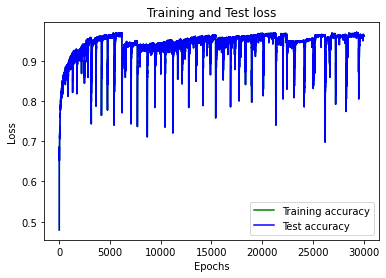

In [32]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
    n_epoch = 30000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    test_loader = test_loader,
    print_plot = True
)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.39674797654151917 Test Accuracy: 0.39674797654151917
Epoch 20) Train Accuracy: 0.6829268336296082 Test Accuracy: 0.6829268336296082
Epoch 30) Train Accuracy: 0.6780487895011902 Test Accuracy: 0.6780487895011902
Epoch 40) Train Accuracy: 0.6764227747917175 Test Accuracy: 0.6764227747917175
Epoch 50) Train Accuracy: 0.7008129954338074 Test Accuracy: 0.7008129954338074
Epoch 60) Train Accuracy: 0.7089430689811707 Test Accuracy: 0.7089430689811707
Epoch 70) Train Accuracy: 0.7154471278190613 Test Accuracy: 0.7154471278190613
Epoch 80) Train Accuracy: 0.7219512462615967 Test Accuracy: 0.7219512462615967
Epoch 90) Train Accuracy: 0.7317073345184326 Test Accuracy: 0.7317073345184326
Epoch 100) Train Accuracy: 0.7414634227752686 Test Accuracy: 0.7414634227752686
Epoch 110) Train Accuracy: 0.7414634227752686 Test Accuracy: 0.7414634227752686
Epoch 120) Train Accuracy: 0.7219512462615967 Test Accuracy: 0.7219512462615967
Epoch 130) Train Accuracy: 0.7528455257415771 T

Epoch 1040) Train Accuracy: 0.8471544981002808 Test Accuracy: 0.8471544981002808
Epoch 1050) Train Accuracy: 0.860162615776062 Test Accuracy: 0.860162615776062
Epoch 1060) Train Accuracy: 0.8504065275192261 Test Accuracy: 0.8504065275192261
Epoch 1070) Train Accuracy: 0.8536585569381714 Test Accuracy: 0.8536585569381714
Epoch 1080) Train Accuracy: 0.8585366010665894 Test Accuracy: 0.8585366010665894
Epoch 1090) Train Accuracy: 0.8585366010665894 Test Accuracy: 0.8585366010665894
Epoch 1100) Train Accuracy: 0.8585366010665894 Test Accuracy: 0.8585366010665894
Epoch 1110) Train Accuracy: 0.8569105863571167 Test Accuracy: 0.8569105863571167
Epoch 1120) Train Accuracy: 0.855284571647644 Test Accuracy: 0.855284571647644
Epoch 1130) Train Accuracy: 0.8048780560493469 Test Accuracy: 0.8048780560493469
Epoch 1140) Train Accuracy: 0.842276394367218 Test Accuracy: 0.842276394367218
Epoch 1150) Train Accuracy: 0.8617886304855347 Test Accuracy: 0.8617886304855347
Epoch 1160) Train Accuracy: 0.8601

Epoch 2060) Train Accuracy: 0.8715447187423706 Test Accuracy: 0.8715447187423706
Epoch 2070) Train Accuracy: 0.8617886304855347 Test Accuracy: 0.8617886304855347
Epoch 2080) Train Accuracy: 0.8943089246749878 Test Accuracy: 0.8943089246749878
Epoch 2090) Train Accuracy: 0.9008129835128784 Test Accuracy: 0.9008129835128784
Epoch 2100) Train Accuracy: 0.8991869688034058 Test Accuracy: 0.8991869688034058
Epoch 2110) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 2120) Train Accuracy: 0.9105691313743591 Test Accuracy: 0.9105691313743591
Epoch 2130) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 2140) Train Accuracy: 0.9089431166648865 Test Accuracy: 0.9089431166648865
Epoch 2150) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 2160) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 2170) Train Accuracy: 0.8943089246749878 Test Accuracy: 0.8943089246749878
Epoch 2180) Train Accuracy: 

Epoch 3080) Train Accuracy: 0.9073171019554138 Test Accuracy: 0.9073171019554138
Epoch 3090) Train Accuracy: 0.9073171019554138 Test Accuracy: 0.9073171019554138
Epoch 3100) Train Accuracy: 0.9186992049217224 Test Accuracy: 0.9186992049217224
Epoch 3110) Train Accuracy: 0.9170731902122498 Test Accuracy: 0.9170731902122498
Epoch 3120) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 3130) Train Accuracy: 0.9186992049217224 Test Accuracy: 0.9186992049217224
Epoch 3140) Train Accuracy: 0.9186992049217224 Test Accuracy: 0.9186992049217224
Epoch 3150) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 3160) Train Accuracy: 0.9170731902122498 Test Accuracy: 0.9170731902122498
Epoch 3170) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 3180) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 3190) Train Accuracy: 0.9154471755027771 Test Accuracy: 0.9154471755027771
Epoch 3200) Train Accuracy: 0.91

Epoch 4100) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 4110) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 4120) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 4130) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 4140) Train Accuracy: 0.8504065275192261 Test Accuracy: 0.8504065275192261
Epoch 4150) Train Accuracy: 0.8341463208198547 Test Accuracy: 0.8341463208198547
Epoch 4160) Train Accuracy: 0.8439024686813354 Test Accuracy: 0.8439024686813354
Epoch 4170) Train Accuracy: 0.8926829099655151 Test Accuracy: 0.8926829099655151
Epoch 4180) Train Accuracy: 0.9105691313743591 Test Accuracy: 0.9105691313743591
Epoch 4190) Train Accuracy: 0.9268292784690857 Test Accuracy: 0.9268292784690857
Epoch 4200) Train Accuracy: 0.9317073225975037 Test Accuracy: 0.9317073225975037
Epoch 4210) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 4220) Train Accuracy: 

Epoch 5120) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 5130) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5140) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 5150) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 5160) Train Accuracy: 0.9577235579490662 Test Accuracy: 0.9577235579490662
Epoch 5170) Train Accuracy: 0.9495934844017029 Test Accuracy: 0.9495934844017029
Epoch 5180) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 5190) Train Accuracy: 0.9560975432395935 Test Accuracy: 0.9560975432395935
Epoch 5200) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 5210) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 5220) Train Accuracy: 0.9626016020774841 Test Accuracy: 0.9626016020774841
Epoch 5230) Train Accuracy: 0.9219512343406677 Test Accuracy: 0.9219512343406677
Epoch 5240) Train Accuracy: 

Epoch 6140) Train Accuracy: 0.9609755873680115 Test Accuracy: 0.9609755873680115
Epoch 6150) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 6160) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 6170) Train Accuracy: 0.9398373961448669 Test Accuracy: 0.9398373961448669
Epoch 6180) Train Accuracy: 0.8617886304855347 Test Accuracy: 0.8617886304855347
Epoch 6190) Train Accuracy: 0.8829268217086792 Test Accuracy: 0.8829268217086792
Epoch 6200) Train Accuracy: 0.8569105863571167 Test Accuracy: 0.8569105863571167
Epoch 6210) Train Accuracy: 0.8959349393844604 Test Accuracy: 0.8959349393844604
Epoch 6220) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 6230) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 6240) Train Accuracy: 0.9479674696922302 Test Accuracy: 0.9479674696922302
Epoch 6250) Train Accuracy: 0.9593495726585388 Test Accuracy: 0.9593495726585388
Epoch 6260) Train Accuracy: 

Epoch 7160) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 7170) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7180) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7190) Train Accuracy: 0.9772357940673828 Test Accuracy: 0.9772357940673828
Epoch 7200) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7210) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7220) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7230) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7240) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7250) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7260) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7270) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 7280) Train Accuracy: 

Epoch 8180) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 8190) Train Accuracy: 0.9707317352294922 Test Accuracy: 0.9707317352294922
Epoch 8200) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 8210) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 8220) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 8230) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 8240) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 8250) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 8260) Train Accuracy: 0.9707317352294922 Test Accuracy: 0.9707317352294922
Epoch 8270) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 8280) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 8290) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 8300) Train Accuracy: 

Epoch 9200) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 9210) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 9220) Train Accuracy: 0.9528455138206482 Test Accuracy: 0.9528455138206482
Epoch 9230) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 9240) Train Accuracy: 0.8341463208198547 Test Accuracy: 0.8341463208198547
Epoch 9250) Train Accuracy: 0.8504065275192261 Test Accuracy: 0.8504065275192261
Epoch 9260) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 9270) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 9280) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 9290) Train Accuracy: 0.9544715285301208 Test Accuracy: 0.9544715285301208
Epoch 9300) Train Accuracy: 0.9723577499389648 Test Accuracy: 0.9723577499389648
Epoch 9310) Train Accuracy: 0.9691057205200195 Test Accuracy: 0.9691057205200195
Epoch 9320) Train Accuracy: 

Epoch 10210) Train Accuracy: 0.9756097793579102 Test Accuracy: 0.9756097793579102
Epoch 10220) Train Accuracy: 0.9788618087768555 Test Accuracy: 0.9788618087768555
Epoch 10230) Train Accuracy: 0.9788618087768555 Test Accuracy: 0.9788618087768555
Epoch 10240) Train Accuracy: 0.9788618087768555 Test Accuracy: 0.9788618087768555
Epoch 10250) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
Epoch 10260) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
Epoch 10270) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
Epoch 10280) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 10290) Train Accuracy: 0.9772357940673828 Test Accuracy: 0.9772357940673828
Epoch 10300) Train Accuracy: 0.9788618087768555 Test Accuracy: 0.9788618087768555
Epoch 10310) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
Epoch 10320) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 10330) Tra

Epoch 11210) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11220) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 11230) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11240) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11250) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 11260) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11270) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 11280) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11290) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11300) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 11310) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
Epoch 11320) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 11330) Tra

Epoch 12210) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 12220) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 12230) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 12240) Train Accuracy: 0.9788618087768555 Test Accuracy: 0.9788618087768555
Epoch 12250) Train Accuracy: 0.9707317352294922 Test Accuracy: 0.9707317352294922
Epoch 12260) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 12270) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 12280) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
Epoch 12290) Train Accuracy: 0.9739837646484375 Test Accuracy: 0.9739837646484375
Epoch 12300) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 12310) Train Accuracy: 0.9674796462059021 Test Accuracy: 0.9674796462059021
Epoch 12320) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
Epoch 12330) Tra

Epoch 13210) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13220) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13230) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13240) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13250) Train Accuracy: 0.9853658676147461 Test Accuracy: 0.9853658676147461
Epoch 13260) Train Accuracy: 0.9853658676147461 Test Accuracy: 0.9853658676147461
Epoch 13270) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13280) Train Accuracy: 0.9853658676147461 Test Accuracy: 0.9853658676147461
Epoch 13290) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13300) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13310) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13320) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 13330) Tra

Epoch 14220) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
Epoch 14230) Train Accuracy: 0.9886178970336914 Test Accuracy: 0.9886178970336914
Epoch 14240) Train Accuracy: 0.9853658676147461 Test Accuracy: 0.9853658676147461
Epoch 14250) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 14260) Train Accuracy: 0.9886178970336914 Test Accuracy: 0.9886178970336914
Epoch 14270) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 14280) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
Epoch 14290) Train Accuracy: 0.9853658676147461 Test Accuracy: 0.9853658676147461
Epoch 14300) Train Accuracy: 0.9902439117431641 Test Accuracy: 0.9902439117431641
Epoch 14310) Train Accuracy: 0.9886178970336914 Test Accuracy: 0.9886178970336914
Epoch 14320) Train Accuracy: 0.9902439117431641 Test Accuracy: 0.9902439117431641
Epoch 14330) Train Accuracy: 0.9886178970336914 Test Accuracy: 0.9886178970336914
Epoch 14340) Tra

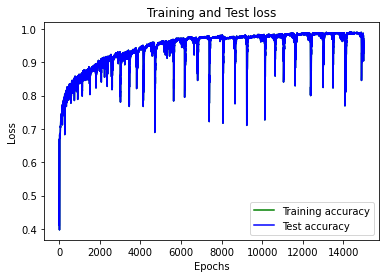

In [33]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
    n_epoch = 15000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    test_loader = test_loader,
    print_plot = True
)


In [ ]:
# Epoch 8030) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
# Epoch 9790) Train Accuracy: 0.9804878234863281 Test Accuracy: 0.9804878234863281
# Epoch 10320) Train Accuracy: 0.9821138381958008 Test Accuracy: 0.9821138381958008
# Epoch 10940) Train Accuracy: 0.9837398529052734 Test Accuracy: 0.9837398529052734
# Epoch 11160) Train Accuracy: 0.9853658676147461 Test Accuracy: 0.9853658676147461
# Epoch 11960) Train Accuracy: 0.9869918823242188 Test Accuracy: 0.9869918823242188
# Epoch 13130) Train Accuracy: 0.9886178970336914 Test Accuracy: 0.9886178970336914
# Epoch 14300) Train Accuracy: 0.9902439117431641 Test Accuracy: 0.9902439117431641
# Epoch 14320) Train Accuracy: 0.9902439117431641 Test Accuracy: 0.9902439117431641



c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.502439022064209 Test Accuracy: 0.502439022064209
Epoch 20) Train Accuracy: 0.6552845239639282 Test Accuracy: 0.6552845239639282
Epoch 30) Train Accuracy: 0.6715447306632996 Test Accuracy: 0.6715447306632996
Epoch 40) Train Accuracy: 0.6991869807243347 Test Accuracy: 0.6991869807243347
Epoch 50) Train Accuracy: 0.7105690836906433 Test Accuracy: 0.7105690836906433
Epoch 60) Train Accuracy: 0.7268292903900146 Test Accuracy: 0.7268292903900146
Epoch 70) Train Accuracy: 0.7349593639373779 Test Accuracy: 0.7349593639373779
Epoch 80) Train Accuracy: 0.7495934963226318 Test Accuracy: 0.7495934963226318
Epoch 90) Train Accuracy: 0.7365853786468506 Test Accuracy: 0.7365853786468506
Epoch 100) Train Accuracy: 0.7447154521942139 Test Accuracy: 0.7447154521942139
Epoch 110) Train Accuracy: 0.7544715404510498 Test Accuracy: 0.7544715404510498
Epoch 120) Train Accuracy: 0.7577235698699951 Test Accuracy: 0.7577235698699951
Epoch 130) Train Accuracy: 0.767479658126831 Test A

Epoch 1040) Train Accuracy: 0.8406503796577454 Test Accuracy: 0.8406503796577454
Epoch 1050) Train Accuracy: 0.8406503796577454 Test Accuracy: 0.8406503796577454
Epoch 1060) Train Accuracy: 0.8390243649482727 Test Accuracy: 0.8390243649482727
Epoch 1070) Train Accuracy: 0.8260162472724915 Test Accuracy: 0.8260162472724915
Epoch 1080) Train Accuracy: 0.8341463208198547 Test Accuracy: 0.8341463208198547
Epoch 1090) Train Accuracy: 0.8373983502388 Test Accuracy: 0.8373983502388
Epoch 1100) Train Accuracy: 0.8504065275192261 Test Accuracy: 0.8504065275192261
Epoch 1110) Train Accuracy: 0.8471544981002808 Test Accuracy: 0.8471544981002808
Epoch 1120) Train Accuracy: 0.8504065275192261 Test Accuracy: 0.8504065275192261
Epoch 1130) Train Accuracy: 0.8487805128097534 Test Accuracy: 0.8487805128097534
Epoch 1140) Train Accuracy: 0.8471544981002808 Test Accuracy: 0.8471544981002808
Epoch 1150) Train Accuracy: 0.8227642178535461 Test Accuracy: 0.8227642178535461
Epoch 1160) Train Accuracy: 0.8276

Epoch 2060) Train Accuracy: 0.8682926893234253 Test Accuracy: 0.8682926893234253
Epoch 2070) Train Accuracy: 0.8682926893234253 Test Accuracy: 0.8682926893234253
Epoch 2080) Train Accuracy: 0.8666666746139526 Test Accuracy: 0.8666666746139526
Epoch 2090) Train Accuracy: 0.8747967481613159 Test Accuracy: 0.8747967481613159
Epoch 2100) Train Accuracy: 0.8373983502388 Test Accuracy: 0.8373983502388
Epoch 2110) Train Accuracy: 0.8406503796577454 Test Accuracy: 0.8406503796577454
Epoch 2120) Train Accuracy: 0.869918704032898 Test Accuracy: 0.869918704032898
Epoch 2130) Train Accuracy: 0.8634146451950073 Test Accuracy: 0.8634146451950073
Epoch 2140) Train Accuracy: 0.8162601590156555 Test Accuracy: 0.8162601590156555
Epoch 2150) Train Accuracy: 0.8471544981002808 Test Accuracy: 0.8471544981002808
Epoch 2160) Train Accuracy: 0.869918704032898 Test Accuracy: 0.869918704032898
Epoch 2170) Train Accuracy: 0.8731707334518433 Test Accuracy: 0.8731707334518433
Epoch 2180) Train Accuracy: 0.87154471

Epoch 3080) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 3090) Train Accuracy: 0.8959349393844604 Test Accuracy: 0.8959349393844604
Epoch 3100) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 3110) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 3120) Train Accuracy: 0.8943089246749878 Test Accuracy: 0.8943089246749878
Epoch 3130) Train Accuracy: 0.8926829099655151 Test Accuracy: 0.8926829099655151
Epoch 3140) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 3150) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 3160) Train Accuracy: 0.8894308805465698 Test Accuracy: 0.8894308805465698
Epoch 3170) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 3180) Train Accuracy: 0.8926829099655151 Test Accuracy: 0.8926829099655151
Epoch 3190) Train Accuracy: 0.9008129835128784 Test Accuracy: 0.9008129835128784
Epoch 3200) Train Accuracy: 

Epoch 4100) Train Accuracy: 0.9105691313743591 Test Accuracy: 0.9105691313743591
Epoch 4110) Train Accuracy: 0.9056910276412964 Test Accuracy: 0.9056910276412964
Epoch 4120) Train Accuracy: 0.9056910276412964 Test Accuracy: 0.9056910276412964
Epoch 4130) Train Accuracy: 0.9056910276412964 Test Accuracy: 0.9056910276412964
Epoch 4140) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 4150) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 4160) Train Accuracy: 0.9008129835128784 Test Accuracy: 0.9008129835128784
Epoch 4170) Train Accuracy: 0.9056910276412964 Test Accuracy: 0.9056910276412964
Epoch 4180) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 4190) Train Accuracy: 0.9056910276412964 Test Accuracy: 0.9056910276412964
Epoch 4200) Train Accuracy: 0.9121951460838318 Test Accuracy: 0.9121951460838318
Epoch 4210) Train Accuracy: 0.9056910276412964 Test Accuracy: 0.9056910276412964
Epoch 4220) Train Accuracy: 

Epoch 5120) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 5130) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 5140) Train Accuracy: 0.8894308805465698 Test Accuracy: 0.8894308805465698
Epoch 5150) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 5160) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 5170) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 5180) Train Accuracy: 0.8894308805465698 Test Accuracy: 0.8894308805465698
Epoch 5190) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 5200) Train Accuracy: 0.8894308805465698 Test Accuracy: 0.8894308805465698
Epoch 5210) Train Accuracy: 0.8878048658370972 Test Accuracy: 0.8878048658370972
Epoch 5220) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 5230) Train Accuracy: 0.8910568952560425 Test Accuracy: 0.8910568952560425
Epoch 5240) Train Accuracy: 

Epoch 6140) Train Accuracy: 0.9105691313743591 Test Accuracy: 0.9105691313743591
Epoch 6150) Train Accuracy: 0.9073171019554138 Test Accuracy: 0.9073171019554138
Epoch 6160) Train Accuracy: 0.9154471755027771 Test Accuracy: 0.9154471755027771
Epoch 6170) Train Accuracy: 0.9105691313743591 Test Accuracy: 0.9105691313743591
Epoch 6180) Train Accuracy: 0.9138211607933044 Test Accuracy: 0.9138211607933044
Epoch 6190) Train Accuracy: 0.9089431166648865 Test Accuracy: 0.9089431166648865
Epoch 6200) Train Accuracy: 0.8943089246749878 Test Accuracy: 0.8943089246749878
Epoch 6210) Train Accuracy: 0.7918699383735657 Test Accuracy: 0.7918699383735657
Epoch 6220) Train Accuracy: 0.8260162472724915 Test Accuracy: 0.8260162472724915
Epoch 6230) Train Accuracy: 0.8536585569381714 Test Accuracy: 0.8536585569381714
Epoch 6240) Train Accuracy: 0.8845528364181519 Test Accuracy: 0.8845528364181519
Epoch 6250) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 6260) Train Accuracy: 

Epoch 7160) Train Accuracy: 0.8813008069992065 Test Accuracy: 0.8813008069992065
Epoch 7170) Train Accuracy: 0.9138211607933044 Test Accuracy: 0.9138211607933044
Epoch 7180) Train Accuracy: 0.9138211607933044 Test Accuracy: 0.9138211607933044
Epoch 7190) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 7200) Train Accuracy: 0.9219512343406677 Test Accuracy: 0.9219512343406677
Epoch 7210) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 7220) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 7230) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 7240) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 7250) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 7260) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 7270) Train Accuracy: 0.9268292784690857 Test Accuracy: 0.9268292784690857
Epoch 7280) Train Accuracy: 0.92845529

Epoch 8180) Train Accuracy: 0.925203263759613 Test Accuracy: 0.925203263759613
Epoch 8190) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 8200) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8210) Train Accuracy: 0.9203252196311951 Test Accuracy: 0.9203252196311951
Epoch 8220) Train Accuracy: 0.9170731902122498 Test Accuracy: 0.9170731902122498
Epoch 8230) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8240) Train Accuracy: 0.9024389982223511 Test Accuracy: 0.9024389982223511
Epoch 8250) Train Accuracy: 0.934959352016449 Test Accuracy: 0.934959352016449
Epoch 8260) Train Accuracy: 0.9040650129318237 Test Accuracy: 0.9040650129318237
Epoch 8270) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 8280) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 8290) Train Accuracy: 0.9154471755027771 Test Accuracy: 0.9154471755027771
Epoch 8300) Train Accuracy: 0.938211

Epoch 9200) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 9210) Train Accuracy: 0.9284552931785583 Test Accuracy: 0.9284552931785583
Epoch 9220) Train Accuracy: 0.9235772490501404 Test Accuracy: 0.9235772490501404
Epoch 9230) Train Accuracy: 0.9365853667259216 Test Accuracy: 0.9365853667259216
Epoch 9240) Train Accuracy: 0.8975609540939331 Test Accuracy: 0.8975609540939331
Epoch 9250) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 9260) Train Accuracy: 0.9333333373069763 Test Accuracy: 0.9333333373069763
Epoch 9270) Train Accuracy: 0.9382113814353943 Test Accuracy: 0.9382113814353943
Epoch 9280) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 9290) Train Accuracy: 0.9414634108543396 Test Accuracy: 0.9414634108543396
Epoch 9300) Train Accuracy: 0.930081307888031 Test Accuracy: 0.930081307888031
Epoch 9310) Train Accuracy: 0.9447154402732849 Test Accuracy: 0.9447154402732849
Epoch 9320) Train Accuracy: 0.

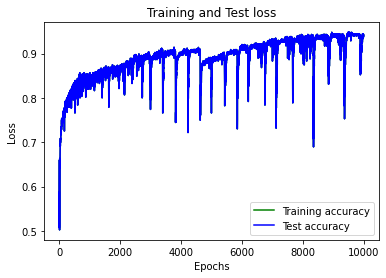

In [40]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
    n_epoch = 10000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    test_loader = test_loader,
    print_plot = True
)


In [ ]:
# I have given different number of epochs, in order to analyse the train and test accurracy
# From my point of view, the best number of epochs is 15 000, as the highest accuracy was 0.99 for both train and test, 
# at the epoch 14 300. Even if the graph doesn't look so good becausde of those bad results, from which those lines appear
# In comparation with the graph with 30 000 epochs, the one with 15 000 looks pretty good. 
# I think that the number 30 000 is too large, because with every epoch, the "bad" accuracies are smaller and smaller.
# Thus, we can observe a tendency which supposes that: the larger the number of epochs, the more chances that there will
# be bigger and bigger deviations.
